![aims](https://aims-senegal.org/wp-content/uploads/sites/2/2020/10/aims_senegal.jpg)

Please **make a copy of this notebook** before starting updating

# **K Means Clustering**

It is an unsupervised machine learning algorithm that is used for clustering (grouping).

---

Clustering is a technique that allows us to find groups of similar objects, objects that are more related to each other than to objects in other groups. 

Examples of clustering applications include the grouping of articles by different topics, or finding customers that share similar interests based on common purchase behaviors.

---

K-means is one of the most popular "clustering" algorithms. The K-means algorithm assign **K** centroids that it used to define the clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.

---

## **The Algorithm**


We are given a training set ${x^{(1)}, ... , x^{(m)}}$, and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point $x^{(i)} \in \mathbb{R}^n$ as usual; but no labels $y^{(i)}$. Our goal is to predict $k$ centroids and a label $c^{(i)}$ for each datapoint. The k-means clustering algorithm is as follows:



1.   Select the number of clusters k
1.   Randomly pick k centroids from the sample points as initial cluster centers.
2.   Assign each sample to the nearest centroid j : j ∈ {1, …, k}.
3.   Move the centroids to the center of the samples that were assigned to it.

4.   Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or maximum number of iterations is reached.


![aims](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

# **Toy Example**

The dataset we are about to create consists of 150 randomly generated points that are roughly grouped into three regions with higher density, which is visualized via a two-dimensional scatterplot.




In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)



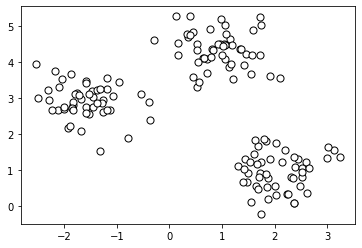

In [ ]:
# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()


In [ ]:
X

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    random_state=0
)
y_km = km.fit_predict(X)

where: 

**n_clusters:** the number of centroids to generate.

**init:** method for centroids initialization

‘random’: choose n_clusters observations (rows) at random from data for the initial centroids.


**n_init:** Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.


**max_iter:** Maximum number of iterations of the k-means algorithm for a single run.   

**random_state:** Determines random number generation for centroid initializatio

In [ ]:
y_km

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1], dtype=int32)

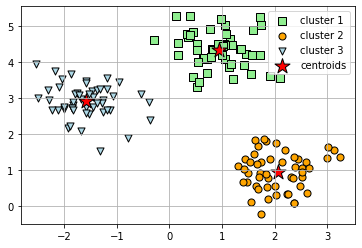

In [ ]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


# **The Elbow Method**

A drawback of k-means is that we have to specify the number of clusters, k, before we know what the optimal k is. The number of clusters to choose may not always be so obvious in real-world applications, especially if we are working with a higher dimensional dataset that cannot be visualized.

The elbow method is a useful graphical tool to estimate the optimal number of clusters k for a given task. Intuitively, we can say that, if k increases, the within-cluster SSE (“distortion”) will decrease. This is because the samples will be closer to the centroids they are assigned to.

The idea behind the elbow method is to identify the value of k where the distortion begins to decrease most rapidly, which will become clearer if we plot the distortion for different values of k:

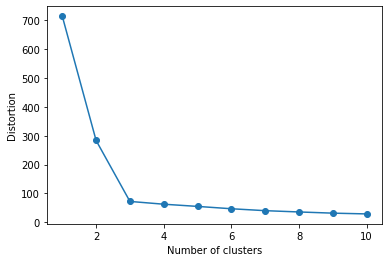

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As we can see in the resulting plot, the elbow is located at k = 3, which is evidence that k = 3 is indeed a good choice for this dataset.

Improved versions of K-means are:


*   [Silhouette plots](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html), another method used to select the optimal k
*    [k-means++](https://https://www.geeksforgeeks.org/ml-k-means-algorithm/), a variant of k-means, that improves clustering results through more clever seeding of the initial cluster centers.



# **Time to code**

Now that we have seen how kmeans works, try to implement in on your own using this helper class.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load the data
data = pd.read_csv('/content/Data.csv')
data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Termination criterion satisfied


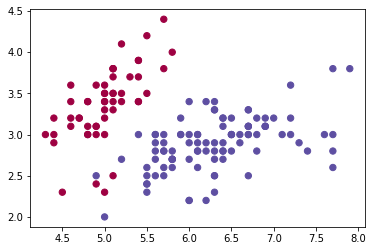

In [ ]:
class KMeans:
  def __init__(self,data, K):
    self.K=K
    #self.epsilon=epsilon
    self.max_iterations = 100
    self.size_examples=data.shape[0]
    self.size_features=data.shape[1]
    self.plot_figure = True


  def initialize(self, X):
    """
    Initilize K random Centroids
    """
    centroids = np.zeros((self.K, self.size_features))
    for k in range(self.K):
        centroid = X[np.random.choice(range(self.size_examples))]
        centroids[k] = centroid

    return centroids

  def Classify(self, X, centroids):
    """
    Classify item to the cluster with minimum distance 

    """
    clusters = [[] for _ in range(self.K)]

 
    for point_idx, point in enumerate(X):
        closest_centroid = np.argmin(
            np.sqrt(np.sum((point - centroids) ** 2, axis=1))
        )
        clusters[closest_centroid].append(point_idx)

    return clusters

  def update_centroids(self, clusters, X):
    centroids = np.zeros((self.K, self.size_features))
    for idx, cluster in enumerate(clusters):
      new_centroid = np.mean(X[cluster], axis=0)
      centroids[idx] = new_centroid

    return centroids

    """
    Calculate the new means
    
    """
    return 

  def predict_cluster(self, clusters, X):
      y_pred = np.zeros(self.size_examples)

      for cluster_idx, cluster in enumerate(clusters):
          for sample_idx in cluster:
              y_pred[sample_idx] = cluster_idx

      return y_pred


  def plot_fig(self, X, y):
    plt.scatter(X[:, 0], X[:, 1],c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()

  def fit(self, X):
      centroids = self.initialize( X)

      for it in range(self.max_iterations):
          clusters = self.Classify(X, centroids)

          previous_centroids = centroids
          centroids = self.update_centroids(clusters, X)

          diff = centroids - previous_centroids

          if not diff.any():
              print("Termination criterion satisfied")
              break

              #Get label predictions
      y_pred = self.predict_cluster(clusters, X)
      # if self.plot_figure:
      self.plot_fig(X, y_pred)

        # return y_pred


 
if __name__ == "__main__":

    Kmeans = KMeans(data.values,2 )
    y_pred = Kmeans.fit(data.values)
 
    


In [ ]:
def PCA(data, k):
  x = np.array(data)
  
  # step 1: calculate the Mean normalization of x

  standard=(x-np.mean(x,axis=0))#/data.std(axis=0)

  # step 2: calculate covariance matrix from the normalized_x
  cov=np.cov(standard, rowvar = False)
  # make the parameter rowvar = False; check the documentation of np.cov to see why..

  # step 3: compute the eigen values and eigen vectors
  values,vectors=np.linalg.eigh(cov)
  # step 4: sort the eigen values in "descending" order, then use this sorted indicies to sort the eigen vectors

  #sort_values=np.sort(values,axis=None)
  sort_value=np.argsort(values)
  sort_vec=vectors[sort_value]
  k_eigenvec=sort_vec[:,k:]
  #   # step 6: transform the data
  data1=standard@k_eigenvec
  return data1 

In [ ]:
k = 2
 # reduce the data dimensionality to 2
z = PCA(data, k)
principal_df = pd.DataFrame(z, columns=['PC1', 'PC2'])
principal_df.head()

,PC1,PC2
0,0.319397,2.684126
1,-0.177001,2.714142
2,-0.144949,2.888991
3,-0.318299,2.745343
4,0.326755,2.728717


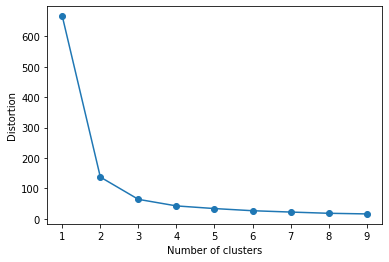

In [ ]:
kmn = KMeans(
    n_clusters=1, init='random',
    n_init=10, max_iter=300, 
    random_state=0
)
y_km = kmn.fit_predict(principal_df)

### Elbow Method ###
distortions = []
for i in range(1, 10):
    kmn = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        random_state=0
    )
    kmn.fit(principal_df)
    distortions.append(kmn.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Termination criterion satisfied


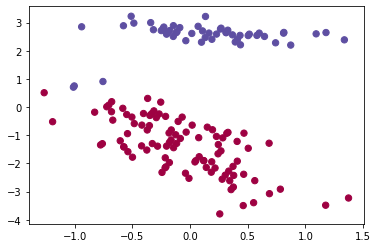

In [ ]:
# From our elbow method, obtaining two clusters will be fine
Kmeans = KMeans(principal_df.values,2 )
y_pred = Kmeans.fit(principal_df.values)

In [ ]:
#Initialize your class and fit on the data


In [ ]:
#perform PCA reduction to obtain two dimesional version of the data suitable for visulization

In [ ]:
#Tune your k Value and visulize the resulting centroids
#Friday before class 